In [1]:
import pymysql
import sqlite3
from pymysql.err import MySQLError
import missingno as msn
import pandas as pd
import csv

In [2]:
mydb = pymysql.connect(
    host="localhost",
    user="root",
    password="First@445",
)
print("Connected to Server")

cursor = mydb.cursor()

Connected to Server


In [3]:
# import the file
df=pd.read_csv(r"C:\Users\Kamalachandran\Desktop\Intern\task\task 7\video games sales.csv")
df.shape

(16598, 11)

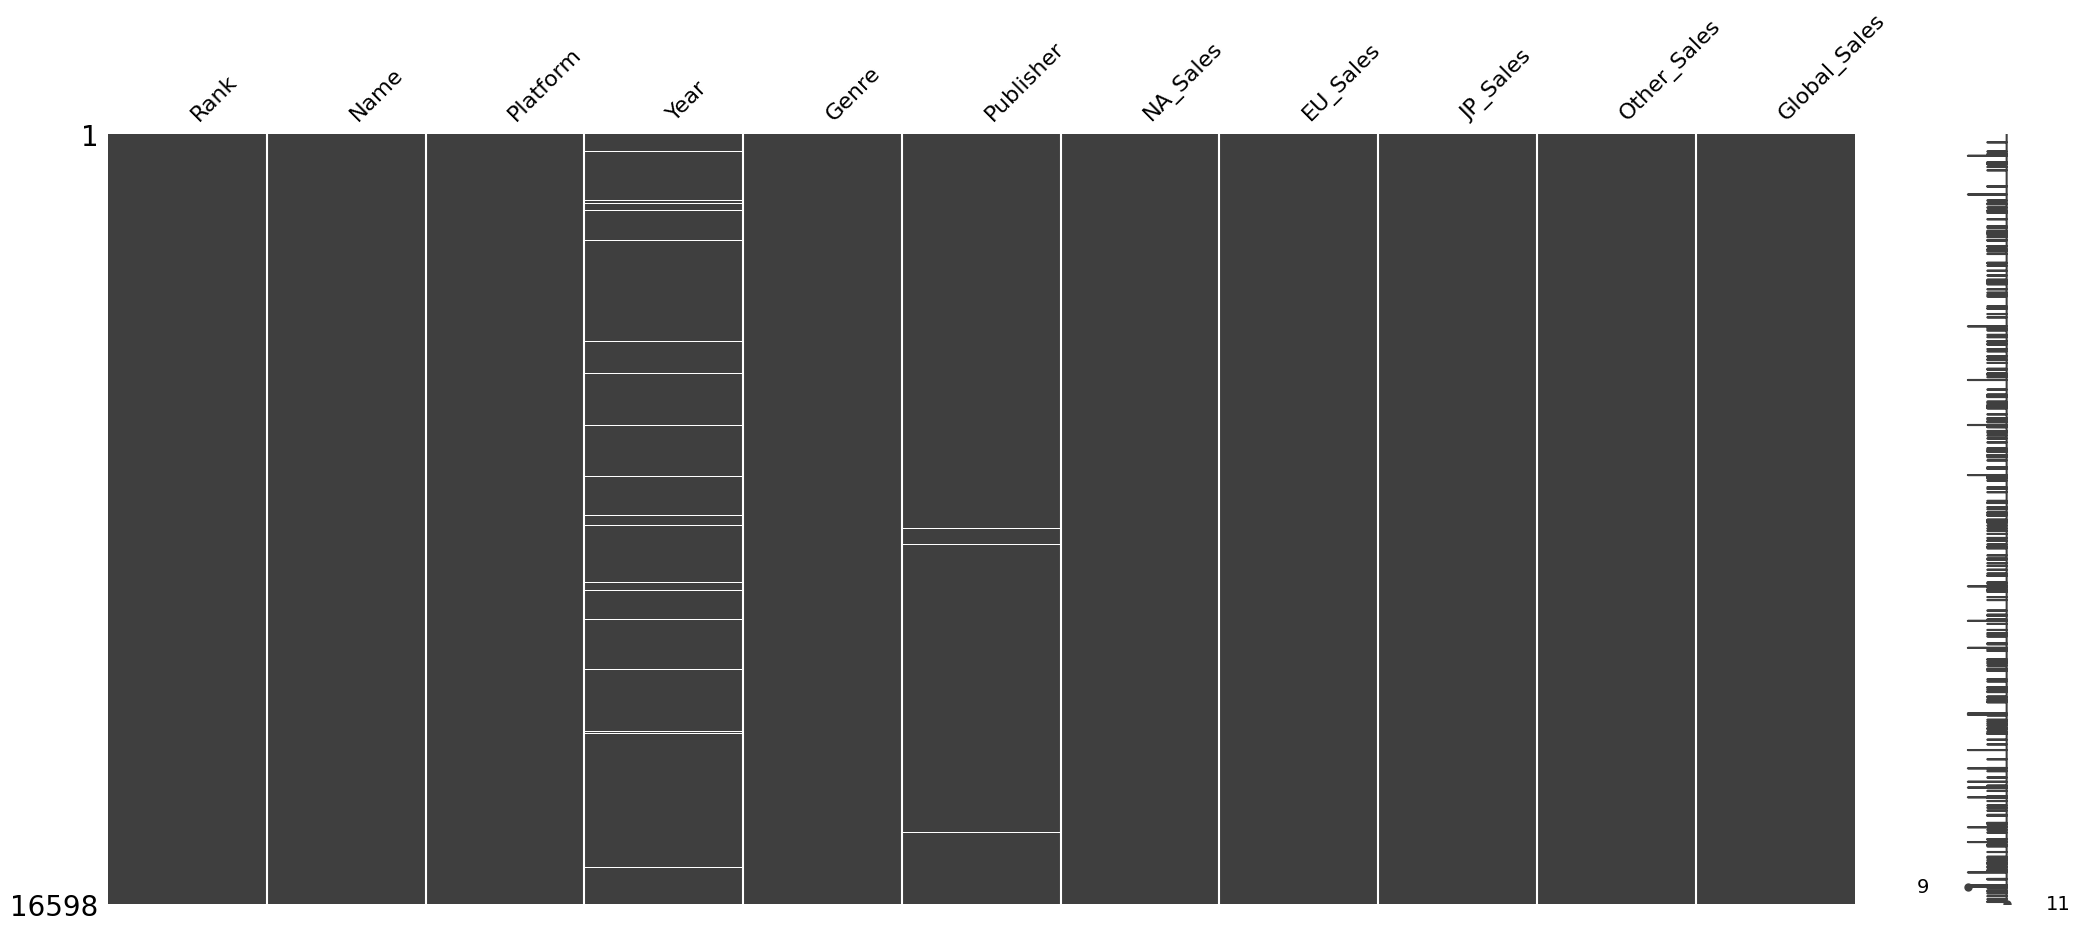

In [4]:
msn.matrix(df);

In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df = df.dropna()
df.shape

(16291, 11)

In [7]:
df.columns = (df.columns.str.strip().str.lower())
df = df.rename(columns={'rank': 'position'})

for i in df.columns:
    print (i)

position
name
platform
year
genre
publisher
na_sales
eu_sales
jp_sales
other_sales
global_sales


In [8]:
df[["na_sales","eu_sales","jp_sales","other_sales","global_sales"]]
=df[["na_sales","eu_sales","jp_sales","other_sales","global_sales"]].astype(float)
df[["position","year"]] = df[["position","year"]].astype(int)

# SQl

In [9]:
try:
    try:
        cursor.execute("CREATE DATABASE sale;")
        print("Database created")
    except MySQLError as e:
        raise

    try:
        cursor.execute("USE sale;")
        cursor.execute("""CREATE TABLE game_sales (Position int,Name text,
         Platform varchar(100),Year int,Genre varchar(100),Publisher text,NA_Sales double,
         EU_Sales double,JP_Sales double,Other_Sales double,Global_Sales double)
                   """)
        print("Table created")
    except MySQLError as e:
        raise
    
except MySQLError as e:
    print("SQL error:", e)

Database created
Table created


In [10]:
try:
    insert_query = """
    INSERT INTO game_sales (position,name,platform,year,genre,publisher,
    na_sales,eu_sales,jp_sales,other_sales,global_sales)

    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """

    data = [tuple(row) for row in df.to_numpy()]
    
    cursor.executemany(insert_query, data)
    
    mydb.commit()
    print(f"{cursor.rowcount} rows inserted successfully!")
    
except MySQLError as e:
    print("SQL error:", e)

16291 rows inserted successfully!


In [11]:
if cursor:
    cursor.close()
if mydb:
    mydb.close()
print("Server Connection Closed")

Server Connection Closed


In [13]:
# Save to SQLite
sqlite_conn = sqlite3.connect("sale.db")  # this creates database.db
df.to_sql("game_sales", sqlite_conn, if_exists="replace", index=False)
sqlite_conn.commit()
sqlite_conn.close()

print("Data is saved to sale.db")

Data is saved to sale.db
